In [1]:
from astropy.io import fits
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import matplotlib
%matplotlib inline


fitFile = "../ELAISN1_MOS15-09_NUV.fits"
hdulist = fits.open(fitFile)

tbdata = hdulist[0].data

inMax = np.zeros(tbdata[0].shape)
inMin = np.empty(tbdata[0].shape)
inMin.fill(float('inf'))

avMatrix = np.zeros(tbdata[0].shape)



for i in range(0, len(tbdata)):
    if tbdata[i].sum() > 20000 and tbdata[i].sum() < 23000:
        inMax = np.maximum(inMax, tbdata[i])
        inMin = np.minimum(inMin, tbdata[i])
   
    

endMatrix = inMax - inMin

hdulist[0].data = endMatrix

#newList = fits.BinTableHDU(tbdata)
#hdulist.writeto("test5.fits")

ImportError: cannot import name matplotlib

In [2]:
from photutils import CircularAperture
image_data = fits.getdata(fitFile)
print image_data.shape

plt.figure(1, figsize=(10, 12))

plt.imshow(tbdata[1], cmap='gray', vmin=1, vmax=12)
plt.colorbar()

positions = ([9], [32])
apertures = CircularAperture(positions, r=5.)
apertures.plot(color='yellow', lw=2.5, alpha=0.5)

plt.figure(2, figsize=(10, 12))

plt.imshow(tbdata[2], cmap='gray', vmin=1, vmax=12)
plt.colorbar()

positions = ([9], [32])
apertures = CircularAperture(positions, r=5.)
apertures.plot(color='yellow', lw=2.5, alpha=0.5)


plottedImage1 = tbdata[1]
plottedImage2 = tbdata[3]



NameError: name 'fitFile' is not defined

In [3]:
np.set_printoptions(threshold='nan')

Y1 = np.arange(100).reshape(10, 10)
Y1 = plottedImage1[25:40,3:15]

plt.figure(1)
plt.figure(figsize=(4, 5))
plt.imshow(Y1, cmap='gray', vmin=0, vmax=20)
plt.colorbar()

Y2 = np.arange(100).reshape(10, 10)
Y2 = plottedImage2[25:40,3:15]

plt.figure(1)
plt.figure(figsize=(4, 5))
plt.imshow(Y2, cmap='gray', vmin=0, vmax=20)
plt.colorbar()


NameError: name 'plottedImage1' is not defined

In [4]:
from astropy.modeling import models, fitting
from photutils import GaussianPSF

#Fit the data using astropy.modeling
p_init = models.Gaussian2D(x_stddev=5, y_stddev=5)
fit_p = fitting.LevMarLSQFitter()


    # Ignore model linearity warning from the fitter
x, y = np.mgrid[:15, :12]
print Y.shape
    
p1 = fit_p(p_init, x, y, Y1)
p2 = fit_p(p_init, x, y, Y2)

plt.figure(1)
Z1 = p1(x, y)
plt.imshow(Z1, cmap='gray', interpolation='nearest', vmin=0, vmax=20)
plt.title("Model")

plt.figure(2)
Z2 = p2(x, y)
plt.imshow(Z2, cmap='gray', interpolation='nearest', vmin=0, vmax=20)
plt.title("Model")

NameError: name 'Y' is not defined

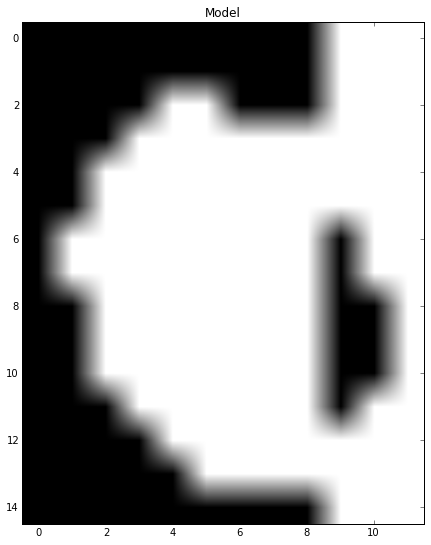

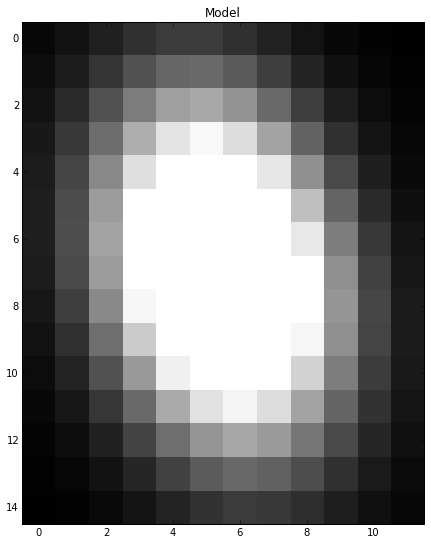

In [206]:
from scipy.optimize import curve_fit



k = np.linalg.lstsq(Z1, Z2)[0]

plt.figure(1)
plt.imshow(Z1*k[0]+k[1], cmap='gray', vmin=0, vmax=20)
plt.title("Model")

plt.figure(2)
plt.imshow(Z2, cmap='gray', interpolation='nearest', vmin=0, vmax=20)
plt.title("Model")